# Paper Figures: Two Schools, Strategic Student Test Taking 

Figure 8

Generates payoff matrices in terms of average admitted skill,
for test policy pairs of schools J1 and J2.

In [99]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:

import pandas as pd
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns

import os
import itertools
import json
import time

from multiprocessing import Pool

# Import my functions
from pipeline import pipeline


from visualization.two_school_strategic_plots import (filter_results_by_target_values, 
                                                      read_saved_inputs,
                                                      plot_avg_admitted_skill_by_policy)


In [204]:
simulation_name = "mult_schools_simulations_policy_testing"
fig_directory = os.path.join("visualization/", simulation_name)
output_root = os.path.join("simulation_data/", simulation_name)

print(fig_directory)
print(output_root)


if not os.path.exists(fig_directory):
    os.makedirs(fig_directory)
    
if not os.path.exists(output_root):
    os.makedirs(output_root)


visualization/mult_schools_simulations_policy_testing
simulation_data/mult_schools_simulations_policy_testing


# Run for multiple instances

Code below runs 'run_two_school_cost_model.py'.

Run for all test policy pairs.

In [102]:
feature_name_map = {-1:"SUB", 0:"FULL"}

In [139]:
test_policy_combinations

[(-1, -1), (-1, 0), (0, -1), (0, 0)]

In [ ]:
# """
# This script runs the two schools cost model (strategic students)
# with varying test policies.

# When running, update the output_directory and
# features_to_use_a and features_to_use_b.
# """

# features_to_use_a = -1
# features_to_use_b = -1

# # Generate all possible combinations of test policies (-1=SUB, 0=FULL)
# test_policy_combinations = list(itertools.product([-1, 0], repeat=2))

# # Create mapping for policy names
# policy_names = {
#     (-1, -1): "SUB_SUB",
#     (-1, 0): "SUB_FULL", 
#     (0, -1): "FULL_SUB",
#     (0, 0): "FULL_FULL"
# }

# for features_to_use_a, features_to_use_b in test_policy_combinations:
#     # Create output root directory based on policy combination
#     output_root = "simulation_data/mult_schools_simulations_policy_testing"

#     output_directory = os.path.join(output_root, f"{policy_names[features_to_use_a, features_to_use_b]}_test/")
#     #output_directory = "simulation_data/mult_schools_simulations_policy_SUB_SUB_test/"
#     n_processes = 16

#     os.makedirs(output_directory, exist_ok=True)

#     # Define your base parameters
#     base_parameters = {
#         "SIMULATION_TYPE": "TWO_SCHOOL_COST_MODEL",
#         "TRUESKILL_DIST": ("NORMAL", 0, 1),
#         "GRID_SEARCH_NUM_THRESHOLDS": 100,
#         "FEATURES_TO_USE_a": features_to_use_a,
#         "FEATURES_TO_USE_b": features_to_use_b,
#         "NUM_STUDENTS":1000,
#     }


#     capacities_to_run_a = [0.2]
#     capacities_to_run_b = [0.2]
#     utilities_to_run_a = [2, 3, 4,]
#     utilities_to_run_b = [1, 2, 3,]
#     test_costs_to_run = [1.75,  2.0, 2.25]

#     # Generate all combinations of parameters
#     parameter_combinations = itertools.product(
#         capacities_to_run_a,
#         capacities_to_run_b,
#         utilities_to_run_a,
#         utilities_to_run_b,
#         test_costs_to_run
#     )

#     # Filter combinations where utility_a > utility_b
#     valid_combinations = [
#         (cap_a, cap_b, util_a, util_b, test_cost)
#         for cap_a, cap_b, util_a, util_b, test_cost in parameter_combinations
#         if util_a > util_b
#         if ((base_parameters["FEATURES_TO_USE_a"]==-1) 
#             or (test_cost < util_a * (base_parameters["FEATURES_TO_USE_a"]+1))) # returns 1 if school a uses test

#     ]


#     # Lists to store parameter sets
#     all_parameters_of_interest = []


#     def run_simulation(args):
#         """Function to run a single simulation with given parameters."""
#         idx, capacity_a, capacity_b, utility_a, utility_b, test_cost = args
#         # Create a copy of the base parameters
#         start_time = time.time()
#         parameters = base_parameters.copy()
        
#         # Update the parameters with the current combination
#         parameters_of_interest = {
#             "CAPACITY_a": capacity_a,
#             "CAPACITY_b": capacity_b,
#             "STUDENT_UTILITY": {"a": utility_a, "b": utility_b},
#             "STUDENT_TEST_COST": test_cost,
#         }
#         parameters.update(parameters_of_interest)
#         print(f"Running with parameters: {parameters}")
        
#         # Run the pipeline function with the current parameters
#         students_df, schools_df, full_params = pipeline(parameters)
        
#         # Save the DataFrames to CSV files
#         students_df.to_csv(os.path.join(output_directory, f"students_df_{idx}.csv"), index=False)
#         schools_df.to_csv(os.path.join(output_directory, f"schools_df_{idx}.csv"), index=False)
        
#         # Append the parameters of interest to the list
#         all_parameters_of_interest.append(parameters_of_interest)
        
#         # Save the parameters of interest to a JSON file after each iteration
#         with open(os.path.join(output_directory, f"parameters_of_interest_{idx}.json"), "w") as file:
#             json.dump(parameters_of_interest, file, indent=4)
#             #json.dump(all_parameters_of_interest, file, indent=4)

#         # Optionally, save the full parameters to another JSON file
#         with open(os.path.join(output_directory, f"full_parameters_{idx}.json"), "w") as file:
#             json.dump(full_params, file, indent=4)
#         end_time = time.time()
#         print(f"{parameters_of_interest}: {end_time - start_time:.2f} seconds")

#     # Use multiprocessing.Pool for parallel processing
#     if __name__ == "__main__":
#         with Pool() as pool:
#             num_processes = n_processes
#             # Prepare arguments for each simulation
#             args_list = [
#                 (idx, capacity_a, capacity_b, utility_a, utility_b, test_cost)
#                 for idx, (capacity_a, capacity_b, utility_a, utility_b, test_cost) in enumerate(valid_combinations)
#             ]
            
#             # Run simulations in parallel
#             pool.map(run_simulation, args_list)

#         print("Simulation complete. Results and parameters saved to files.")
    
    

    

Process SpawnPoolWorker-27:
Process SpawnPoolWorker-34:
Process SpawnPoolWorker-28:
Process SpawnPoolWorker-29:
Process SpawnPoolWorker-30:
Process SpawnPoolWorker-32:
Process SpawnPoolWorker-33:
Process SpawnPoolWorker-31:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Applications/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Applications/anaconda3/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Applications/anaconda3/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **se

KeyboardInterrupt: 

# Read in simulation data


In [205]:
policy_names = ["SUB_SUB_test", "SUB_FULL_test", "FULL_SUB_test", "FULL_FULL_test"]
#data_directory_prefix = "simulation_data/mult_schools_simulations_policy_testing/"

num_buckets_qtilde_sub = 20

In [206]:
# output_directory = "simulation_data/mult_schools_simulations_policy_SUB_SUB_nonstrategic_code_new_test_costs/"
# output_directory = "simulation_data/outputs_20251127"
#output_directory = "simulation_data/mult_schools_simulations_policy_testing/"

In [207]:
import os

# Define the directory containing your files
directory = output_root

# Initialize a set to store unique indices
indices = set()

# List all files in the directory
folders = os.listdir(directory)

# Iterate over the files and extract indices
# files = [f for f in folders if os.path.isfile(os.path.join(directory, f))]
for folder in folders:
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
    for file in files:
        if file.startswith("full_parameters_") and file.endswith(".json"):
            index = int(file.split("_")[-1].split(".")[0])
            indices.add(index)
        elif file.startswith("students_df_") and file.endswith(".csv"):
            index = int(file.split("_")[-1].split(".")[0])
            indices.add(index)
        elif file.startswith("schools_df_") and file.endswith(".csv"):
            index = int(file.split("_")[-1].split(".")[0])
            indices.add(index)

In [208]:
print(folders), print(files), print(indices)

['SUB_FULL_test', 'FULL_FULL_test', 'FULL_SUB_test', 'SUB_SUB_test']
['parameters_of_interest_115.json', 'students_df_110.csv', 'parameters_of_interest_103.json', 'students_df_104.csv', 'full_parameters_3.json', 'parameters_of_interest_10.json', 'students_df_0.csv', 'students_df_1.csv', 'students_df_105.csv', 'students_df_111.csv', 'full_parameters_17.json', 'full_parameters_115.json', 'students_df_107.csv', 'students_df_113.csv', 'full_parameters_103.json', 'parameters_of_interest_2.json', 'students_df_3.csv', 'students_df_2.csv', 'students_df_112.csv', 'students_df_106.csv', 'students_df_102.csv', 'students_df_116.csv', 'students_df_6.csv', 'students_df_7.csv', 'full_parameters_102.json', 'parameters_of_interest_3.json', 'students_df_117.csv', 'students_df_103.csv', 'full_parameters_114.json', 'full_parameters_16.json', 'students_df_115.csv', 'students_df_101.csv', 'students_df_5.csv', 'students_df_4.csv', 'parameters_of_interest_11.json', 'full_parameters_2.json', 'students_df_100.c

(None, None, None)

In [209]:
from collections import defaultdict

parameters_of_interest_dicts = defaultdict(dict)
full_parameters_dicts = defaultdict(dict)
students_dfs = defaultdict(dict)
schools_dfs = defaultdict(dict)

for policy in policy_names:
    output_directory = os.path.join(output_root, policy)
    print(output_directory)
    for index in indices:
        try:
            parameters_of_interest, full_parameters, students_df, schools_df = read_saved_inputs(index, output_directory)
            
            binned_data, bins = pd.qcut(students_df["normal_learning_aware-1_score"], 
                                                    num_buckets_qtilde_sub, retbins=True, labels=False)


            # Map each row to the appropriate left edge
            #df["left_edge"] = df["bins"].map(lambda x: left_edges[x])
            
            students_df['qtilde_sub_cut'] = binned_data.map(lambda x: bins[x])
            
            parameters_of_interest_dicts[policy][index] = parameters_of_interest
            full_parameters_dicts[policy][index] = full_parameters
            students_dfs[policy][index] = students_df
            schools_dfs[policy][index] = schools_df
        except:
            print(f"No file found for index {index} in {policy}")
    

simulation_data/mult_schools_simulations_policy_testing/SUB_SUB_test
simulation_data/mult_schools_simulations_policy_testing/SUB_FULL_test
simulation_data/mult_schools_simulations_policy_testing/FULL_SUB_test
No file found for index 16 in FULL_SUB_test
No file found for index 17 in FULL_SUB_test
No file found for index 117 in FULL_SUB_test
simulation_data/mult_schools_simulations_policy_testing/FULL_FULL_test
No file found for index 16 in FULL_FULL_test
No file found for index 17 in FULL_FULL_test
No file found for index 117 in FULL_FULL_test


In [210]:
len(parameters_of_interest_dicts[policy])

33

In [211]:
len(students_dfs[policy])

33

In [215]:
results = []
# Iterate over each policy and index
for policy in policy_names:
    for index in indices:
        try:
            # Extract the DataFrame for the current policy and index
            df = schools_dfs[policy][index]
            
            # Get the average admitted skills for school a and b
            avg_skill_school_a = df.iloc[0]["avgadmittedskill"]
            avg_skill_school_b = df.iloc[1]["avgadmittedskill"]
            
            # Get the parameters for the current policy and index
            params = parameters_of_interest_dicts[policy][index]
            
            # Append the results to the list
            results.append({
                "Policy": policy,
                "Index": index,
                "avgadmittedskill_school_a": avg_skill_school_a,
                "avgadmittedskill_school_b": avg_skill_school_b,
                **params  # Unpack the parameters into the dictionary
            })
        except:
            print(f"No file found for index {index} in {policy}")
# Convert the results to a DataFrame
results_df = pd.DataFrame(results)


No file found for index 16 in FULL_SUB_test
No file found for index 17 in FULL_SUB_test
No file found for index 117 in FULL_SUB_test
No file found for index 16 in FULL_FULL_test
No file found for index 17 in FULL_FULL_test
No file found for index 117 in FULL_FULL_test


In [216]:
results_df

,Policy,Index,avgadmittedskill_school_a,avgadmittedskill_school_b,CAPACITY_a,CAPACITY_b,STUDENT_UTILITY,STUDENT_TEST_COST
0,SUB_SUB_test,0,1.009947,0.327025,0.2,0.2,"{'a': 2, 'b': 1}",1.75
1,SUB_SUB_test,1,1.009947,0.327025,0.2,0.2,"{'a': 2, 'b': 1}",2.00
2,SUB_SUB_test,2,1.009947,0.327025,0.2,0.2,"{'a': 2, 'b': 1}",2.25
3,SUB_SUB_test,3,1.009947,0.327025,0.2,0.2,"{'a': 3, 'b': 1}",1.75
4,SUB_SUB_test,4,1.009947,0.327025,0.2,0.2,"{'a': 3, 'b': 1}",2.00
...,...,...,...,...,...,...,...,...
133,FULL_FULL_test,112,1.086128,0.332468,0.2,0.2,"{'a': 4, 'b': 2}",1.50
134,FULL_FULL_test,113,1.038659,0.297953,0.2,0.2,"{'a': 4, 'b': 2}",2.00
135,FULL_FULL_test,114,1.089034,0.408482,0.2,0.2,"{'a': 4, 'b': 3}",0.50
136,FULL_FULL_test,115,1.082847,0.356976,0.2,0.2,"{'a': 4, 'b': 3}",1.50


In [217]:
results_df.head()

,Policy,Index,avgadmittedskill_school_a,avgadmittedskill_school_b,CAPACITY_a,CAPACITY_b,STUDENT_UTILITY,STUDENT_TEST_COST
0,SUB_SUB_test,0,1.009947,0.327025,0.2,0.2,"{'a': 2, 'b': 1}",1.75
1,SUB_SUB_test,1,1.009947,0.327025,0.2,0.2,"{'a': 2, 'b': 1}",2.00
2,SUB_SUB_test,2,1.009947,0.327025,0.2,0.2,"{'a': 2, 'b': 1}",2.25
3,SUB_SUB_test,3,1.009947,0.327025,0.2,0.2,"{'a': 3, 'b': 1}",1.75
4,SUB_SUB_test,4,1.009947,0.327025,0.2,0.2,"{'a': 3, 'b': 1}",2.00


In [218]:
results_df[['UTILITY_a', 'UTILITY_b']] = results_df['STUDENT_UTILITY'].apply(pd.Series)

results_df["STUDENT_TEST_COST"] = results_df["STUDENT_TEST_COST"].fillna(0)

In [219]:
results_df.head()

,Policy,Index,avgadmittedskill_school_a,avgadmittedskill_school_b,CAPACITY_a,CAPACITY_b,STUDENT_UTILITY,STUDENT_TEST_COST,UTILITY_a,UTILITY_b
0,SUB_SUB_test,0,1.009947,0.327025,0.2,0.2,"{'a': 2, 'b': 1}",1.75,2,1
1,SUB_SUB_test,1,1.009947,0.327025,0.2,0.2,"{'a': 2, 'b': 1}",2.00,2,1
2,SUB_SUB_test,2,1.009947,0.327025,0.2,0.2,"{'a': 2, 'b': 1}",2.25,2,1
3,SUB_SUB_test,3,1.009947,0.327025,0.2,0.2,"{'a': 3, 'b': 1}",1.75,3,1
4,SUB_SUB_test,4,1.009947,0.327025,0.2,0.2,"{'a': 3, 'b': 1}",2.00,3,1


In [220]:
# Results for (SUB, SUB) policy pair
sub_sub_results = (results_df.query("Policy == 'SUB_SUB_test'")[["UTILITY_a", "UTILITY_b", "avgadmittedskill_school_a", "avgadmittedskill_school_b", "CAPACITY_a", "CAPACITY_b", "STUDENT_TEST_COST"]]
 .groupby(["UTILITY_a", "UTILITY_b"])
 .mean()
 .reset_index()
 )

In [221]:
sub_sub_results

,UTILITY_a,UTILITY_b,avgadmittedskill_school_a,avgadmittedskill_school_b,CAPACITY_a,CAPACITY_b,STUDENT_TEST_COST
0,2,1,0.992432,0.320379,0.2,0.2,1.666667
1,3,1,0.992432,0.320379,0.2,0.2,1.666667
2,3,2,0.992432,0.320379,0.2,0.2,1.666667
3,4,1,0.992432,0.320379,0.2,0.2,1.666667
4,4,2,0.992432,0.320379,0.2,0.2,1.666667
5,4,3,0.992432,0.320379,0.2,0.2,1.666667


In [222]:
results_df.query("Index == 4")

,Policy,Index,avgadmittedskill_school_a,avgadmittedskill_school_b,CAPACITY_a,CAPACITY_b,STUDENT_UTILITY,STUDENT_TEST_COST,UTILITY_a,UTILITY_b
4,SUB_SUB_test,4,1.009947,0.327025,0.2,0.2,"{'a': 3, 'b': 1}",2.00,3,1
40,SUB_FULL_test,4,1.009947,NaN,0.2,0.2,"{'a': 3, 'b': 1}",2.00,3,1
76,FULL_SUB_test,4,0.398783,1.009947,0.2,0.2,"{'a': 3, 'b': 2}",1.75,3,2
109,FULL_FULL_test,4,1.074956,0.275929,0.2,0.2,"{'a': 3, 'b': 2}",1.75,3,2


In [224]:
# (results_df
#  .groupby("Index")[["UTILITY_a", "UTILITY_b"]]
#  .value_counts()
# )


In [ ]:
results_df.groupby("Index")[["UTILITY_a", "UTILITY_b"]]

UTILITY_a                                        UTILITY_b            \
          count mean      std  min  25%  50%  75%  max     count mean  std   
Index                                                                        
0           4.0  2.0  0.00000  2.0  2.0  2.0  2.0  2.0       4.0  1.0  0.0   
1           4.0  2.5  0.57735  2.0  2.0  2.5  3.0  3.0       4.0  1.0  0.0   

                                
       min  25%  50%  75%  max  
Index                           
0      1.0  1.0  1.0  1.0  1.0  
1      1.0  1.0  1.0  1.0  1.0

In [134]:
results_df.query("Index == 105")

,Policy,Index,avgadmittedskill_school_a,avgadmittedskill_school_b,CAPACITY_a,CAPACITY_b,STUDENT_UTILITY,STUDENT_TEST_COST,UTILITY_a,UTILITY_b
23,SUB_SUB_test,105,0.974918,0.313734,0.2,0.2,"{'a': 3, 'b': 1}",2.0,3,1
59,SUB_FULL_test,105,0.974918,NaN,0.2,0.2,"{'a': 3, 'b': 1}",2.0,3,1
93,FULL_SUB_test,105,1.010331,0.355904,0.2,0.2,"{'a': 3, 'b': 2}",0.5,3,2
126,FULL_FULL_test,105,1.089034,0.408222,0.2,0.2,"{'a': 3, 'b': 2}",0.5,3,2


In [225]:
target_values={#'UTILITY_b': target_utility_b, 
                'STUDENT_TEST_COST': target_test_cost,
                'UTILITY_a': target_utility_a,
                }
feature_to_vary = "UTILITY_b"
# Filter the results DataFrame based on target values, excluding the feature to vary
filtered_results = results_df.copy()
for feature, value in target_values.items():
    filtered_results = filtered_results[filtered_results[feature] == value]
#print(filtered_results)

# Calculate mean sub-sub results for the feature to vary
temp_sub_results = sub_sub_results.groupby(feature_to_vary).mean()


In [230]:
parameters_of_interest_dicts['SUB_SUB_test'][4]

{'CAPACITY_a': 0.2,
 'CAPACITY_b': 0.2,
 'STUDENT_UTILITY': {'a': 3, 'b': 1},
 'STUDENT_TEST_COST': 2.0}

In [231]:
parameters_of_interest_dicts['SUB_SUB_test'][105]

{'CAPACITY_a': 0.2,
 'CAPACITY_b': 0.2,
 'STUDENT_UTILITY': {'a': 3, 'b': 1},
 'STUDENT_TEST_COST': 2.0}

In [232]:
parameters_of_interest_dicts['SUB_SUB_test'][108]

{'CAPACITY_a': 0.2,
 'CAPACITY_b': 0.2,
 'STUDENT_UTILITY': {'a': 3, 'b': 2},
 'STUDENT_TEST_COST': 2.0}

In [238]:
parameters_of_interest_dicts['SUB_FULL_test'][4]

{'CAPACITY_a': 0.2,
 'CAPACITY_b': 0.2,
 'STUDENT_UTILITY': {'a': 3, 'b': 1},
 'STUDENT_TEST_COST': 2.0}

In [239]:
parameters_of_interest_dicts['SUB_FULL_test'][105]

{'CAPACITY_a': 0.2,
 'CAPACITY_b': 0.2,
 'STUDENT_UTILITY': {'a': 3, 'b': 1},
 'STUDENT_TEST_COST': 2.0}

In [247]:
(filtered_results
 .query("Policy != 'SUB_SUB_test'")
 .groupby(list(filtered_results.columns))
 .mean()
 .reset_index()
 )

,Policy,avgadmittedskill_school_a,avgadmittedskill_school_b,CAPACITY_a,CAPACITY_b,STUDENT_TEST_COST,UTILITY_a,UTILITY_b
0,FULL_FULL_test,0.984333,0.357545,0.2,0.2,2.0,3,1
1,FULL_FULL_test,1.013892,0.261774,0.2,0.2,2.0,3,1
2,FULL_FULL_test,1.039742,0.242848,0.2,0.2,2.0,3,2
3,FULL_FULL_test,1.064240,0.251194,0.2,0.2,2.0,3,2
4,FULL_SUB_test,0.330575,0.974918,0.2,0.2,2.0,3,1
5,FULL_SUB_test,0.330575,0.974918,0.2,0.2,2.0,3,2
6,FULL_SUB_test,0.365449,1.009947,0.2,0.2,2.0,3,1
7,FULL_SUB_test,0.365449,1.009947,0.2,0.2,2.0,3,2


In [245]:
filtered_results[['Policy', 'avgadmittedskill_school_a', feature_to_vary]]

,Policy,avgadmittedskill_school_a,UTILITY_b
0,FULL_FULL_test,0.984333,1
1,FULL_FULL_test,1.064240,2
2,FULL_FULL_test,1.013892,1
3,FULL_FULL_test,1.039742,2
4,FULL_SUB_test,0.365449,1
5,FULL_SUB_test,0.365449,2
6,FULL_SUB_test,0.330575,1
7,FULL_SUB_test,0.330575,2


In [248]:
target_values={#'UTILITY_b': target_utility_b, 
                'STUDENT_TEST_COST': target_test_cost,
                'UTILITY_a': target_utility_a,
                }
feature_to_vary = "UTILITY_b"
# Filter the results DataFrame based on target values, excluding the feature to vary
filtered_results = results_df.copy()
filtered_results = filtered_results.drop(columns=['STUDENT_UTILITY',
                                                  'Index'])


for feature, value in target_values.items():
    filtered_results = filtered_results[filtered_results[feature] == value]
#print(filtered_results)

# Calculate mean sub-sub results for the feature to vary
temp_sub_results = sub_sub_results.groupby(feature_to_vary).mean()

# Take the mean in case there are multiple rows with the same parameter values
group_cols = [col for col in filtered_results.columns if col not in ['avgadmittedskill_school_a', 'avgadmittedskill_school_b']]
filtered_results = (
    filtered_results
    .query("Policy != 'SUB_SUB_test'")
    .groupby(group_cols)
    .mean()
    .reset_index()
)

# Prepare data for School 1
temp_df_a = (filtered_results
    [['Policy', 'avgadmittedskill_school_a', feature_to_vary]]
    .set_index(['Policy', feature_to_vary])
    .unstack(level=0)
)
temp_df_a.columns = temp_df_a.columns.droplevel(0)

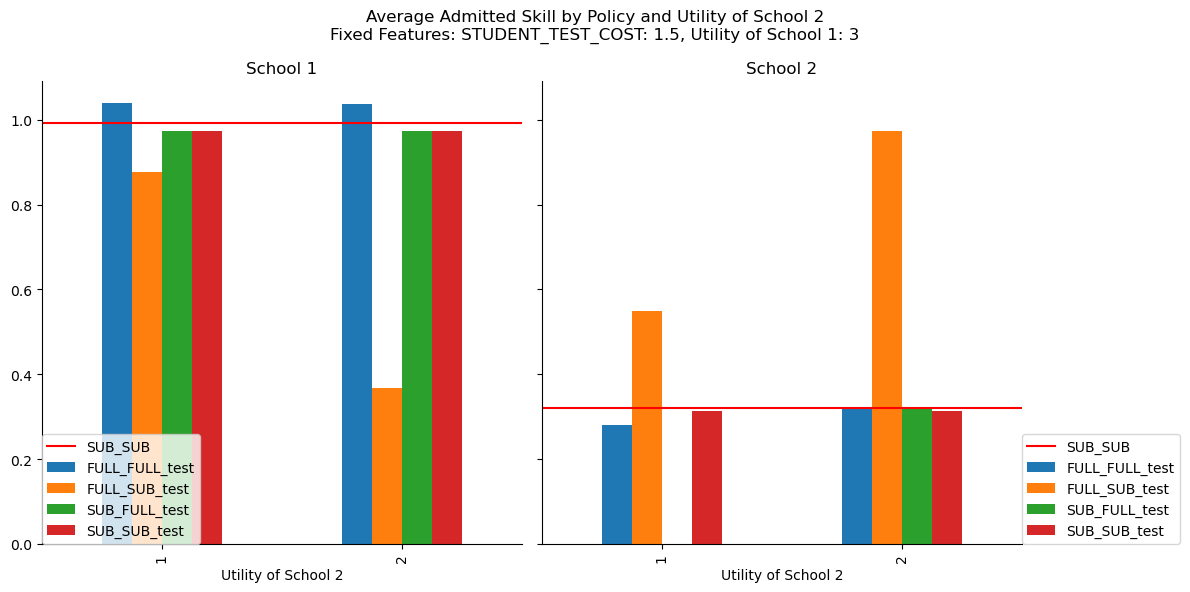

In [250]:
# Example usage
target_utility_a = results_df.UTILITY_a.unique()[1]
target_utility_b = results_df.UTILITY_b.unique()[1]
target_test_cost = np.sort(results_df.STUDENT_TEST_COST.unique())[1]
feature_to_vary = "UTILITY_b"

plot_avg_admitted_skill_by_policy(
    results_df=results_df,
    sub_sub_results=sub_sub_results,
    feature_to_vary=feature_to_vary,
    target_values={#'UTILITY_b': target_utility_b, 
                   'STUDENT_TEST_COST': target_test_cost,
                   'UTILITY_a': target_utility_a,
                   },
)

### Heatmap of payoff matrix

In [265]:
from visualization.two_school_strategic_plots import plot_avg_admitted_skill_by_policy_heatmap

In [269]:
fig_directory

'visualization/mult_schools_simulations_policy_testing'

In [271]:
target_values

{'UTILITY_b': 2, 'STUDENT_TEST_COST': 2, 'UTILITY_a': 3}

/Users/hql2002/Projects/school_admission_policies/visualization/two_school_strategic_plots.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


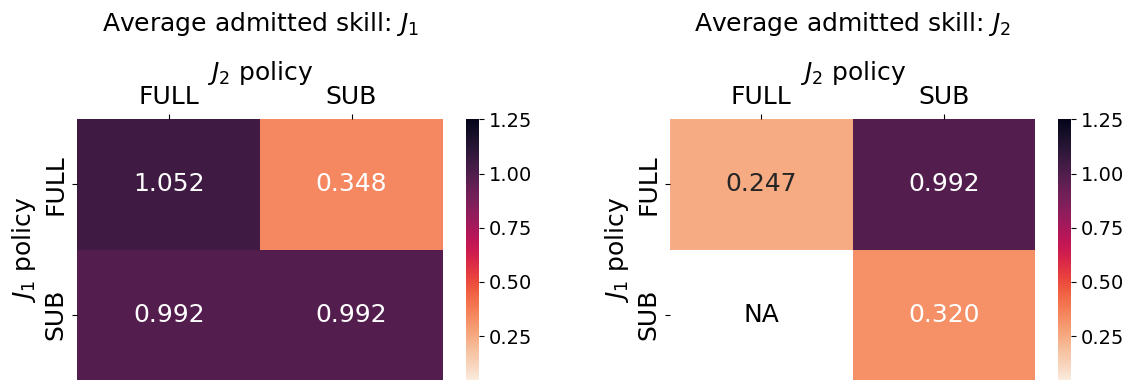

In [281]:
target_utility_a = 3
target_utility_b = 2
target_test_cost = 2

target_values = {'UTILITY_b': target_utility_b, 
                'STUDENT_TEST_COST': target_test_cost,
                'UTILITY_a': target_utility_a,
                }



plot_avg_admitted_skill_by_policy_heatmap(results_df=results_df,
                                            sub_sub_results=sub_sub_results,
                                            feature_to_vary=None,
                                            target_values=target_values,
                                            fig_directory=fig_directory,
                                            )

In [ ]:
# target_utility_a = 3
# target_utility_b = 2
# target_test_cost = 2

# target_values = {'UTILITY_b': target_utility_b, 
#                 'STUDENT_TEST_COST': target_test_cost,
#                 'UTILITY_a': target_utility_a,
#                 }

# results_a, results_b = filter_results_by_target_values(
#                                             results_df=results_df,
#                                             sub_sub_results=sub_sub_results,
#                                             feature_to_vary=None,
#                                             target_values=target_values,
#                                             )

# results_a = results_a[results_a["Policy"] != "SUB_SUB_test"]
# results_b = results_b[results_b["Policy"] != "SUB_SUB_test"]

/Users/hql2002/Projects/school_admission_policies/visualization/two_school_strategic_plots.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  if feature_to_vary is not None:


In [ ]:

# # Extract the action parts from the policy names
# results_a['Action_A'] = results_a['Policy'].apply(lambda x: x.split('_')[0])
# results_a['Action_B'] = results_a['Policy'].apply(lambda x: x.split('_')[1])
# matrix_a = results_a.pivot(index='Action_A', columns='Action_B',
#                          values=0)

# # Extract the action parts from the policy names
# results_b['Action_A'] = results_b['Policy'].apply(lambda x: x.split('_')[0])
# results_b['Action_B'] = results_b['Policy'].apply(lambda x: x.split('_')[1])
# matrix_b = results_b.pivot(index='Action_A', columns='Action_B',
#                          values=0)



/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


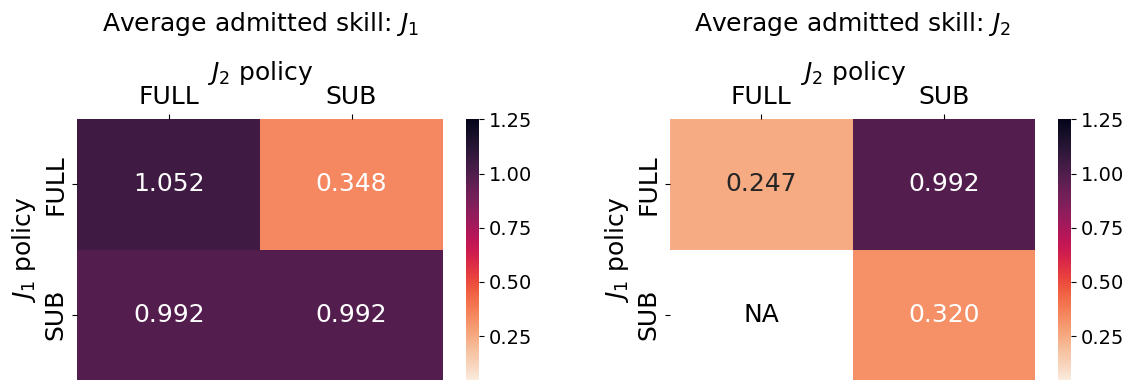

In [ ]:
# # Create heatmap of matrix_a values
# # Create a figure with two subplots side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# # Plot heatmap of matrix_a
# epsilon = 0.2
# vmin = min(matrix_a.min().min(), matrix_b.min().min()) - epsilon
# vmax = max(matrix_a.max().max(), matrix_b.max().max()) + epsilon
# sns.heatmap(matrix_a, annot=True, fmt='.3f', ax=ax1, vmin=vmin, vmax=vmax, 
#             cmap=sns.cm.rocket_r, annot_kws={"size": 18}) 
# ax1.set_title("Average admitted skill: $J_1$", fontsize=18, pad=20)
# ax1.xaxis.set_label_position('top')
# ax1.set_xlabel("$J_2$ policy", fontsize=18)
# ax1.xaxis.tick_top()
# ax1.set_ylabel("$J_1$ policy", fontsize=18)
# ax1.tick_params(axis='both', which='major', labelsize=18)



# # Plot heatmap of matrix_b
# mask = matrix_b.isnull()
# sns.heatmap(matrix_b, annot=True, fmt='.3f', ax=ax2, vmin=vmin, vmax=vmax,
#             cmap=sns.cm.rocket_r, annot_kws={"size": 18}, mask=mask
#             )
# # Get the colorbars from both heatmaps
# colorbar1 = ax1.collections[0].colorbar
# colorbar2 = ax2.collections[0].colorbar

# # Set font size for colorbar tick labels
# colorbar1.ax.tick_params(labelsize=14)
# colorbar2.ax.tick_params(labelsize=14)




# # # Customize the appearance of NA cells
# # Create a mask for NA values
# sns.heatmap(matrix_b, mask=~mask, cmap=['grey'], cbar=False, ax=ax2)
# # Annotate NaN cells with "NA"
# for i in range(matrix_b.shape[0]):
#     for j in range(matrix_b.shape[1]):
#         if mask.iloc[i, j]:
#             ax2.text(j + 0.5, i + 0.5, 'NA', ha='center', va='center', color='black', fontsize=18)

# ax2.set_title("Average admitted skill: $J_2$", fontsize=18, pad=20)
# ax2.xaxis.set_label_position('top')
# ax2.xaxis.tick_top()
# ax2.set_xlabel("$J_2$ policy", fontsize=18)
# ax2.set_ylabel("$J_1$ policy", fontsize=18)
# ax2.tick_params(axis='both', which='major', labelsize=18)

# plt.subplots_adjust(wspace=10)

# plt.tight_layout()
# plt.savefig(fig_directory + "avg_skill_heatmap_utila{}_utilb{}_cost{}.png".format(
#     target_utility_a, target_utility_b, target_test_cost), 
#             dpi=300)

### Plot with utility_a = 3, utility_b = 2, test_cost = 0.5

In [279]:
fig_directory

'visualization/mult_schools_simulations_policy_testing'

/Users/hql2002/Projects/school_admission_policies/visualization/two_school_strategic_plots.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


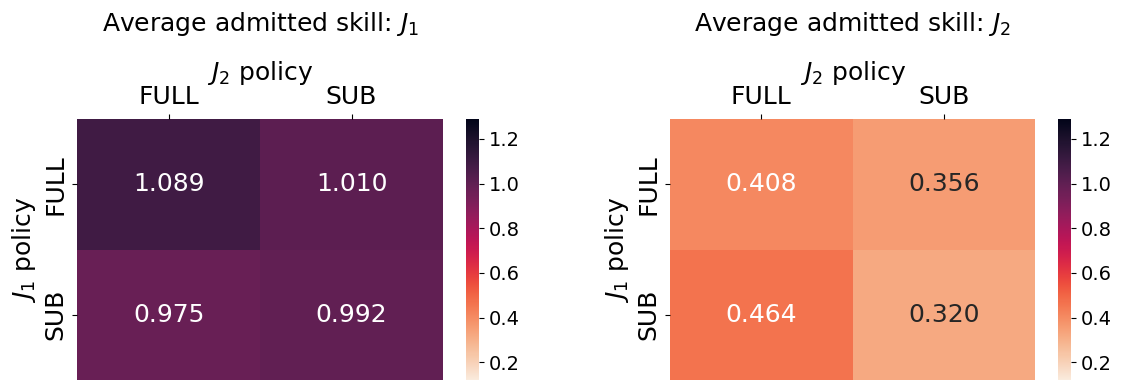

In [280]:

target_utility_a = 3
target_utility_b = 2
target_test_cost = 0.5

target_values = {'UTILITY_b': target_utility_b, 
                'STUDENT_TEST_COST': target_test_cost,
                'UTILITY_a': target_utility_a,
                }

plot_avg_admitted_skill_by_policy_heatmap(results_df=results_df,
                                            sub_sub_results=sub_sub_results,
                                            feature_to_vary=None,
                                            target_values=target_values,
                                            fig_directory=fig_directory,
                                            )



In [278]:

# target_utility_a = 3
# target_utility_b = 2
# target_test_cost = 0.5

# results_a, results_b = filter_results_by_target_values(
#                                             results_df=results_df,
#                                             sub_sub_results=sub_sub_results,
#                                             feature_to_vary=None,
#                                             target_values={'UTILITY_b': target_utility_b, 
#                                                         'STUDENT_TEST_COST': target_test_cost,
#                                                         'UTILITY_a': target_utility_a,
#                                                         },
#                                             )

# results_a = results_a.reset_index()
# results_b = results_b.reset_index()


# # Extract the action parts from the policy names
# results_a['Action_A'] = results_a['Policy'].apply(lambda x: x.split('_')[0])
# results_a['Action_B'] = results_a['Policy'].apply(lambda x: x.split('_')[1])
# matrix_a = results_a.pivot(index='Action_A', columns='Action_B',
#                          values=0)

# # Extract the action parts from the policy names
# results_b['Action_A'] = results_b['Policy'].apply(lambda x: x.split('_')[0])
# results_b['Action_B'] = results_b['Policy'].apply(lambda x: x.split('_')[1])
# matrix_b = results_b.pivot(index='Action_A', columns='Action_B',
#                          values=0)

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


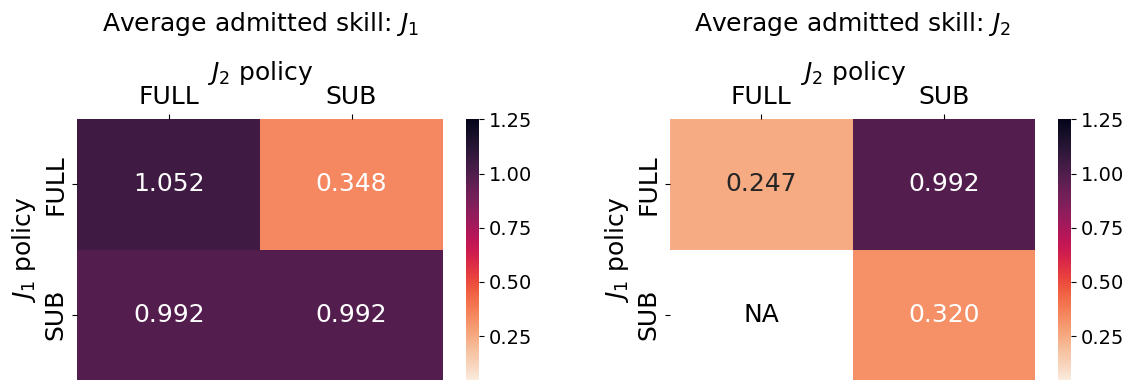

In [ ]:
# # Create heatmap of matrix_a values
# # Create a figure with two subplots side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# # Plot heatmap of matrix_a
# epsilon = 0.2
# vmin = min(matrix_a.min().min(), matrix_b.min().min()) - epsilon
# vmax = max(matrix_a.max().max(), matrix_b.max().max()) + epsilon
# sns.heatmap(matrix_a, annot=True, fmt='.3f', ax=ax1, vmin=vmin, vmax=vmax, 
#             cmap=sns.cm.rocket_r, annot_kws={"size": 18}) 
# ax1.set_title("Average admitted skill: $J_1$", fontsize=18, pad=20)
# ax1.xaxis.set_label_position('top')
# ax1.set_xlabel("$J_2$ policy", fontsize=18)
# ax1.xaxis.tick_top()
# ax1.set_ylabel("$J_1$ policy", fontsize=18)
# ax1.tick_params(axis='both', which='major', labelsize=18)

# # Plot heatmap of matrix_b
# mask = matrix_b.isnull()
# sns.heatmap(matrix_b, annot=True, fmt='.3f', ax=ax2, vmin=vmin, vmax=vmax,
#             cmap=sns.cm.rocket_r, annot_kws={"size": 18}, mask=mask
#             #na_color="grey", 
#             #annot_kws_na={"label": "NA"}
#             )



# # Get the colorbars from both heatmaps
# colorbar1 = ax1.collections[0].colorbar
# colorbar2 = ax2.collections[0].colorbar

# # Set font size for colorbar tick labels
# colorbar1.ax.tick_params(labelsize=14)
# colorbar2.ax.tick_params(labelsize=14)


# # # Customize the appearance of NA cells
# # Create a mask for NA values
# sns.heatmap(matrix_b, mask=~mask, cmap=['grey'], cbar=False, ax=ax2)
# # Annotate NaN cells with "NA"
# for i in range(matrix_b.shape[0]):
#     for j in range(matrix_b.shape[1]):
#         if mask.iloc[i, j]:
#             ax2.text(j + 0.5, i + 0.5, 'NA', ha='center', va='center', color='black', fontsize=18)

# ax2.set_title("Average admitted skill: $J_2$", fontsize=18, pad=20)
# ax2.xaxis.set_label_position('top')
# ax2.xaxis.tick_top()
# ax2.set_xlabel("$J_2$ policy", fontsize=18)
# ax2.set_ylabel("$J_1$ policy", fontsize=18)
# ax2.tick_params(axis='both', which='major', labelsize=18)

# plt.subplots_adjust(wspace=10)

# plt.tight_layout()
# # plt.savefig(fig_directory + "avg_skill_heatmap_utila{}_utilb{}_cost{}.png".format(
# #     target_utility_a, target_utility_b, target_test_cost), 
# #             dpi=300)

### Appendix figures


/Users/hql2002/Projects/school_admission_policies/visualization/two_school_strategic_plots.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


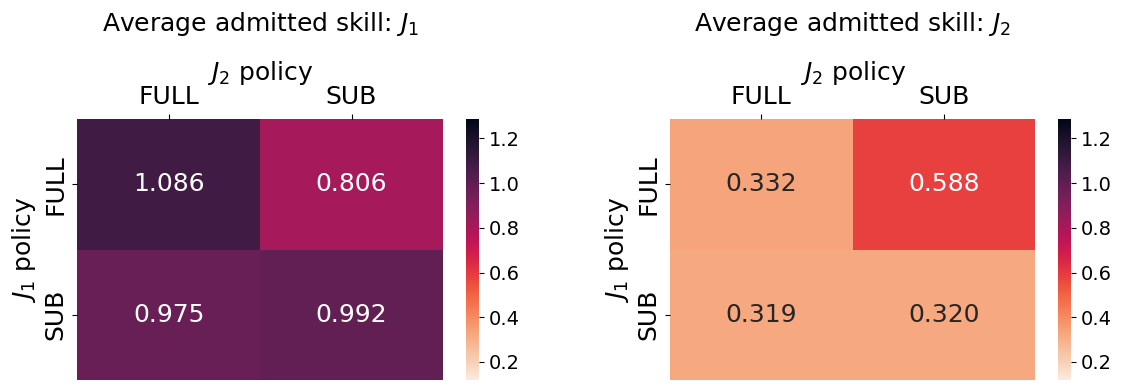

In [285]:
target_utility_a = 4
target_utility_b = 2
target_test_cost = 1.5

target_values = {'UTILITY_b': target_utility_b, 
                'STUDENT_TEST_COST': target_test_cost,
                'UTILITY_a': target_utility_a,
                }

plot_avg_admitted_skill_by_policy_heatmap(results_df=results_df,
                                            sub_sub_results=sub_sub_results,
                                            feature_to_vary=None,
                                            target_values=target_values,
                                            fig_directory=fig_directory,
                                            )

/Users/hql2002/Projects/school_admission_policies/visualization/two_school_strategic_plots.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


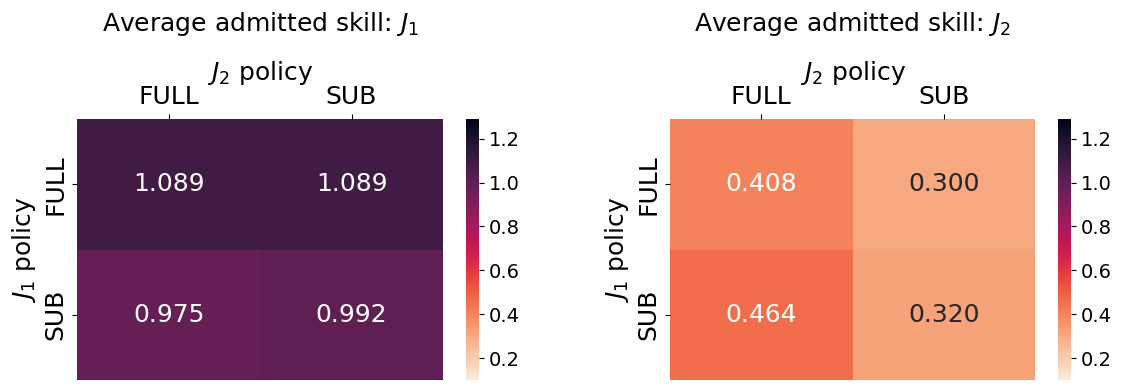

In [289]:
target_utility_a = 4
target_utility_b = 2
target_test_cost = 0.5

target_values = {'UTILITY_b': target_utility_b, 
                'STUDENT_TEST_COST': target_test_cost,
                'UTILITY_a': target_utility_a,
                }

plot_avg_admitted_skill_by_policy_heatmap(results_df=results_df,
                                            sub_sub_results=sub_sub_results,
                                            feature_to_vary=None,
                                            target_values=target_values,
                                            fig_directory=fig_directory,
                                            )

/Users/hql2002/Projects/school_admission_policies/visualization/two_school_strategic_plots.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


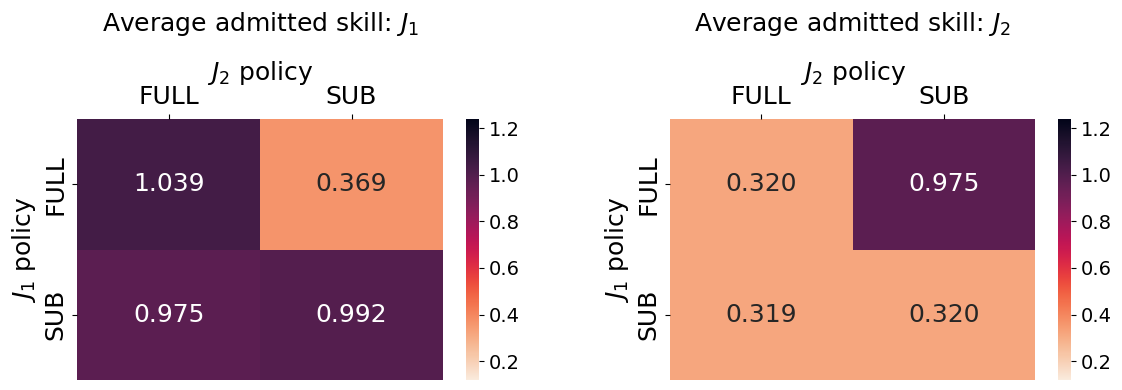

In [ ]:
# target_utility_a = 3
# target_utility_b = 2
# target_test_cost = 1.5

# target_values = {'UTILITY_b': target_utility_b, 
#                 'STUDENT_TEST_COST': target_test_cost,
#                 'UTILITY_a': target_utility_a,
#                 }

# plot_avg_admitted_skill_by_policy_heatmap(results_df=results_df,
#                                             sub_sub_results=sub_sub_results,
#                                             feature_to_vary=None,
#                                             target_values=target_values,
#                                             fig_directory=fig_directory,
#                                             )

In [1107]:

target_utility_a = 3
target_utility_b = 2
target_test_cost = 1.5

results_a, results_b = filter_results_by_target_values(
                                            results_df=results_df,
                                            sub_sub_results=sub_sub_results,
                                            feature_to_vary=None,
                                            target_values={'UTILITY_b': target_utility_b, 
                                                        'STUDENT_TEST_COST': target_test_cost,
                                                        'UTILITY_a': target_utility_a,
                                                        },
                                            )

results_a = results_a.reset_index()
results_b = results_b.reset_index()

results_a = results_a[results_a["Policy"] != "SUB_SUB_nonstrategic_code"]
results_b = results_b[results_b["Policy"] != "SUB_SUB_nonstrategic_code"]

# Extract the action parts from the policy names
results_a['Action_A'] = results_a['Policy'].apply(lambda x: x.split('_')[0])
results_a['Action_B'] = results_a['Policy'].apply(lambda x: x.split('_')[1])
matrix_a = results_a.pivot(index='Action_A', columns='Action_B',
                         values=0)

# Extract the action parts from the policy names
results_b['Action_A'] = results_b['Policy'].apply(lambda x: x.split('_')[0])
results_b['Action_B'] = results_b['Policy'].apply(lambda x: x.split('_')[1])
matrix_b = results_b.pivot(index='Action_A', columns='Action_B',
                         values=0)

/var/folders/nh/c5btrdls7t165h7hmmljwqj80000gq/T/ipykernel_15196/1824059421.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_a = temp_df_a.append(
/var/folders/nh/c5btrdls7t165h7hmmljwqj80000gq/T/ipykernel_15196/1824059421.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_b = temp_df_b.append(pd.Series({0:sub_sub_results['avgadmittedskill_school_b'].mean(),


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


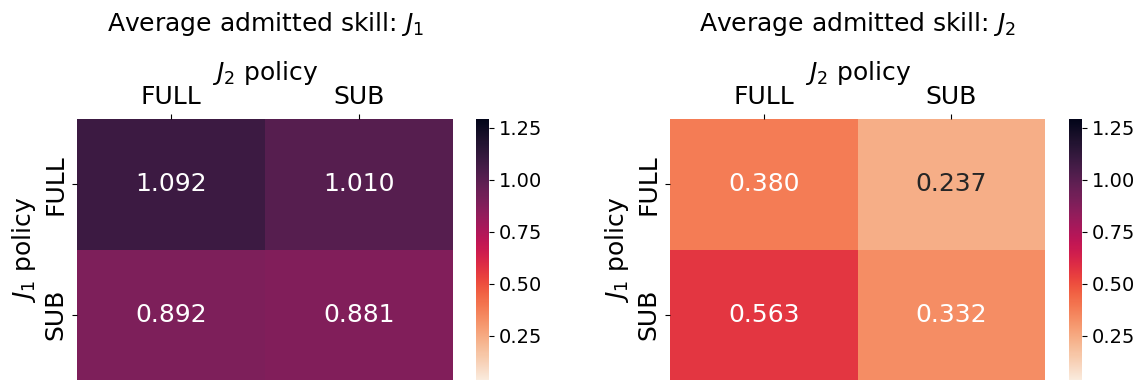

In [1109]:
# Create heatmap of matrix_a values
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot heatmap of matrix_a
epsilon = 0.2
vmin = min(matrix_a.min().min(), matrix_b.min().min()) - epsilon
vmax = max(matrix_a.max().max(), matrix_b.max().max()) + epsilon
sns.heatmap(matrix_a, annot=True, fmt='.3f', ax=ax1, vmin=vmin, vmax=vmax, 
            cmap=sns.cm.rocket_r, annot_kws={"size": 18}) 
ax1.set_title("Average admitted skill: $J_1$", fontsize=18, pad=20)
ax1.xaxis.set_label_position('top')
ax1.set_xlabel("$J_2$ policy", fontsize=18)
ax1.xaxis.tick_top()
ax1.set_ylabel("$J_1$ policy", fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=18)

# Plot heatmap of matrix_b
mask = matrix_b.isnull()
sns.heatmap(matrix_b, annot=True, fmt='.3f', ax=ax2, vmin=vmin, vmax=vmax,
            cmap=sns.cm.rocket_r, annot_kws={"size": 18}, mask=mask
            #na_color="grey", 
            #annot_kws_na={"label": "NA"}
            )



# Get the colorbars from both heatmaps
colorbar1 = ax1.collections[0].colorbar
colorbar2 = ax2.collections[0].colorbar

# Set font size for colorbar tick labels
colorbar1.ax.tick_params(labelsize=14)
colorbar2.ax.tick_params(labelsize=14)


# # Customize the appearance of NA cells
# Create a mask for NA values
sns.heatmap(matrix_b, mask=~mask, cmap=['grey'], cbar=False, ax=ax2)
# Annotate NaN cells with "NA"
for i in range(matrix_b.shape[0]):
    for j in range(matrix_b.shape[1]):
        if mask.iloc[i, j]:
            ax2.text(j + 0.5, i + 0.5, 'NA', ha='center', va='center', color='black', fontsize=18)

ax2.set_title("Average admitted skill: $J_2$", fontsize=18, pad=20)
ax2.xaxis.set_label_position('top')
ax2.xaxis.tick_top()
ax2.set_xlabel("$J_2$ policy", fontsize=18)
ax2.set_ylabel("$J_1$ policy", fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

plt.subplots_adjust(wspace=10)

plt.tight_layout()
# plt.savefig(fig_directory + "avg_skill_heatmap_utila{}_utilb{}_cost{}.png".format(
#     target_utility_a, target_utility_b, target_test_cost), 
#             dpi=300)